Integrantes:


> Uyaguari Noemi

> Yerovi Jaime

# **Work Shop**

# Linear Regression: Predicting House Prices

**Description:**
Given a dataset of house prices along with features such as the number of bedrooms, square footage, location, age of the house, etc., you must implement a linear regression model to predict the price of a house based on its features.

**Evaluation Criteria:**

*   Proper data preprocessing (handling missing values, normalization, etc.).
*   Implementation of the linear regression algorithm.
*   Evaluation of the model using metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).
*   Visualization of the regression line or curve.

**Task:**

*   Data Preprocessing
*   Model Building
*   Model Evaluation
*   Visualization

El objetivo de este ejercicio es implementar un modelo de regresión lineal utilizando TensorFlow para predecir los precios de la vivienda según el conjunto de datos de vivienda de California. El conjunto de datos contiene varias características, como el ingreso promedio, la edad promedio de la vivienda y más. Su tarea es construir un modelo de regresión lineal y evaluar su desempeño.

In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Cargar el Data Set California Housing, y dividirlo en caracteristicas y variable objetivo.

In [14]:
raw = fetch_california_housing()
X = pd.DataFrame(data=raw['data'], columns=raw['feature_names'])
y = pd.Series(raw['target'])
print (X)
#print (y)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Dividir el conjunto

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)

(16512, 8)
(4128, 8)


Normalizar

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Escalar los datos de entrada

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Convertir los datos de entrenamiento y prueba a tensores de TensorFlow

In [18]:
X_train_tensor = tf.constant(X_train_scaled, dtype=tf.float32)
y_train_tensor = tf.constant(y_train.to_numpy().reshape(-1, 1), dtype=tf.float32)
X_test_tensor = tf.constant(X_test_scaled, dtype=tf.float32)
y_test_tensor = tf.constant(y_test.to_numpy().reshape(-1, 1), dtype=tf.float32)

Definir las variables para los pesos (W) y el sesgo (b) del modelo

In [19]:
W = tf.Variable(tf.random.normal(shape=(X_train.shape[1], 1)), dtype=tf.float32)
b = tf.Variable(0.0, dtype=tf.float32)

Definir el modelo de regresión lineal

In [20]:
def linear_regression(X):
    return tf.matmul(X, W) + b

Definir la función de pérdida como el error cuadrático medio entre los valores predichos y los valores verdaderos

In [21]:
def loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - y_true))

Elegir un optimizador Gradient Descent para minimizar la función de pérdida

In [22]:
optimizer = tf.optimizers.SGD(learning_rate=0.01)

Entrenamos el modelo con RMSE

In [28]:
# Entrena el modelo
epochs = 1000

for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Calcula las predicciones y la pérdida en el conjunto de entrenamiento
        y_pred_train = linear_regression(X_train_tensor)
        current_loss = loss(y_train_tensor, y_pred_train)

    # Calcula los gradientes
    gradients = tape.gradient(current_loss, [W, b])

    # Actualiza los pesos y sesgo utilizando el optimizador
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if epoch % 100 == 0:
        # Calcula la pérdida en el conjunto de prueba
        y_pred_test = linear_regression(X_test_tensor)
        test_loss = loss(y_test_tensor, y_pred_test)

        # Calcula el RMSE para el conjunto de prueba
        rmse = tf.sqrt(tf.reduce_mean(tf.square(y_pred_test - y_test_tensor)))

        # Imprime el RMSE de entrenamiento y prueba en intervalos regulares
        print(f"Época {epoch}: RMSE de Entrenamiento = {rmse.numpy()}, RMSE de Prueba = {rmse.numpy()}")

# Evalúa el modelo
y_pred_test = linear_regression(X_test_tensor)
mse = np.mean(np.square(y_pred_test - y_test.to_numpy().reshape(-1, 1)))
rmse = np.sqrt(rmse)

print("RMSE:",rmse)

Época 0: RMSE de Entrenamiento = 0.7448965311050415, RMSE de Prueba = 0.7448965311050415
Época 100: RMSE de Entrenamiento = 0.745016872882843, RMSE de Prueba = 0.745016872882843
Época 200: RMSE de Entrenamiento = 0.7451189756393433, RMSE de Prueba = 0.7451189756393433
Época 300: RMSE de Entrenamiento = 0.7452049851417542, RMSE de Prueba = 0.7452049851417542
Época 400: RMSE de Entrenamiento = 0.7452772259712219, RMSE de Prueba = 0.7452772259712219
Época 500: RMSE de Entrenamiento = 0.7453376054763794, RMSE de Prueba = 0.7453376054763794
Época 600: RMSE de Entrenamiento = 0.7453879117965698, RMSE de Prueba = 0.7453879117965698
Época 700: RMSE de Entrenamiento = 0.7454296350479126, RMSE de Prueba = 0.7454296350479126
Época 800: RMSE de Entrenamiento = 0.745464026927948, RMSE de Prueba = 0.745464026927948
Época 900: RMSE de Entrenamiento = 0.7454923987388611, RMSE de Prueba = 0.7454923987388611
RMSE: 0.863419


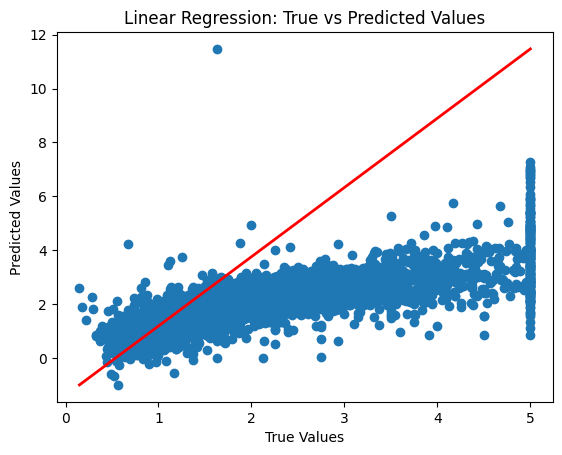

In [62]:
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_pred_test), max(y_pred_test)], color='red', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: True vs Predicted Values")
plt.show()

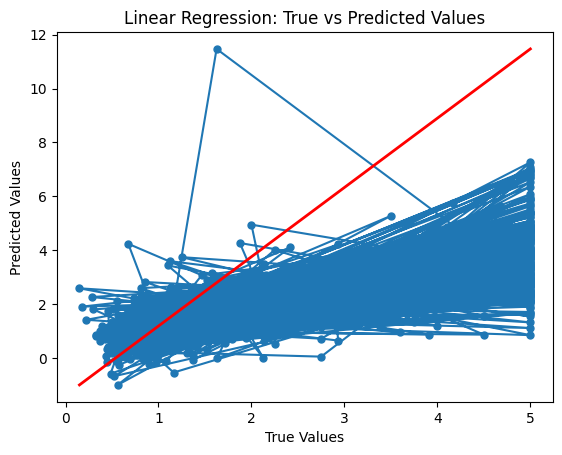

In [61]:
plt.plot(y_test, y_pred_test,marker = "o", markersize = 5)
plt.plot([min(y_test), max(y_test)], [min(y_pred_test), max(y_pred_test)], color='red', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: True vs Predicted Values")
plt.show()

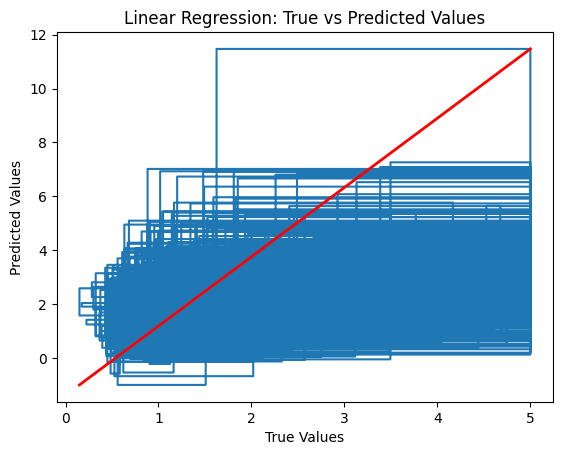

In [60]:
plt.step(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_pred_test), max(y_pred_test)], color='red', linewidth=2)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: True vs Predicted Values")
plt.show()

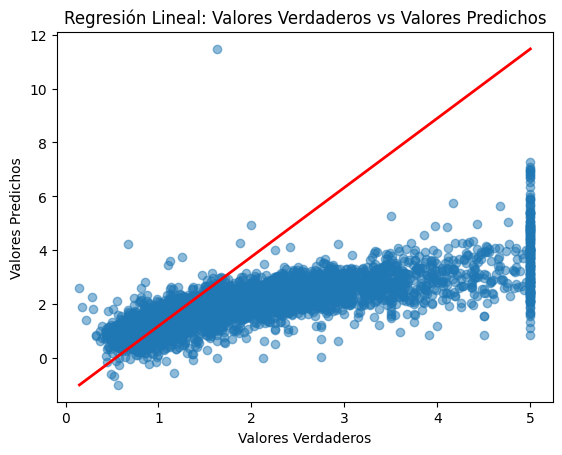

In [59]:
# Crear un gráfico de dispersión
plt.scatter(y_test, y_pred_test, alpha=0.5)

# Agregar una línea de regresión lineal
plt.plot([min(y_test), max(y_test)], [min(y_pred_test), max(y_pred_test)], color='red', linewidth=2)

plt.xlabel("Valores Verdaderos")
plt.ylabel("Valores Predichos")
plt.title("Regresión Lineal: Valores Verdaderos vs Valores Predichos")

plt.show()